# Measuring stress likelihood by syllable in sonnets

In [7]:
# !pip install -r ../requirements.txt
import sys
sys.path.append('../')
from generative_formalism import *

In [8]:
# Docs
documentation(get_sonnet_rhythm_data)

# Run
df_rhythm = get_sonnet_rhythm_data(
    sample_by='sonnet_period',
    as_in_paper=True,
    as_replicated=False,
    force=False,
    verbose=True,
)

# Display
df_rhythm

##### `get_sonnet_rhythm_data`

```md
Get combined rhythm analysis data for sonnets from multiple sources.

    Collects and combines rhythm measurements for sonnets from three main sources:
    1. Chadwyck corpus sonnets (historical periods C17-19 and C20)
    2. Shakespeare's 154 sonnets
    3. GenAI-generated sonnets

    The function retrieves rhythm measurements for each source, adds period
    labels, and combines them into a single DataFrame for comparative analysis.
    Results are filtered to sonnets with 10-12 syllables per line.

    Returns
    -------
    pd.DataFrame
        Combined rhythm data with columns including:
        - Rhythm measurements (from get_rhythm_for_* functions)
        - group : str, period label ("C17-19", "C20", "Shakespeare", "GenAI")
        - source : str, data source ("chadwyck", "shakespeare", "genai")
        - Additional metadata from original datasets
        Filtered to sonnets with 10-12 syllables per line.

    Calls
    -----
    - get_chadwyck_corpus_sampled_by(sample_by)
    - get_rhythm_for_sample(df_smpl)
    - get_rhythm_for_shakespeare_sonnets()
    - get_genai_rhyme_promptings_as_in_paper()
    - get_rhythm_for_sample(df_genai_sonnets, gen=False)
    
```
----


* Loading sonnet rhythm data from {PATH_REPO}/data/data_as_in_paper/sonnet_rhythm_data_by_sonnet_period.csv.gz


,stanza_num,line_num,line_txt,linepart_num,parse_rank,parse_txt,is_iambic_pentameter,is_unambigously_iambic_pentameter,syll01_stress,syll02_stress,...,year,num_lines,volume,line,rhyme,genre,period,txt,group,source
id,,,,,,,,,,,,,,,,,,,,,
english/smithcha/Z300489005,1,1,"Mute is thy wild harp, now, O Bard sublime!",1,1,MUTE is.thy WILD harp NOW o BARD su BLIME,0,0,1,0,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,2,"Who, amid Scotia's mountain solitude,",4,1,WHO a MID.SCO tia's MOUN tain SO li TUDE,0,0,1,0,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,3,"Great Nature taught to ""built the lofty rhyme,""",6,1,great NA ture TAUGHT to BUILT the LOF ty RHYME,1,0,1,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,4,"And even beneath the daily pressure, rude,",9,1,and E ven.be NEATH the DAI ly PRES sure RUDE,0,0,0,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,5,"Of labouring Poverty, thy generous blood,",11,1,of LA bou.ring PO ver TY thy GE ne.rous BLOOD,0,0,0,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94740e74,3,9,"Alas, 'tis not thy presence that I crave,",17,1,a LAS 'tis NOT thy PRE sence THAT i CRAVE,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
94740e74,3,10,"But rather thee, dear love, forever mine.",19,1,but RAT her THEE dear LOVE fo RE ver MINE,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
94740e74,3,11,"Yet still, I wait and pine, in sorrow's wave,",22,1,yet STILL i WAIT and PINE in SOR row's WAVE,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai


##### `get_rhythm_data_by_syll`

```md
Transform rhythm data from wide to long format for syllable-level analysis.

    Takes rhythm measurement data with syllable columns (e.g., syll_1_stress, syll_2_stress)
    and melts them into a long-format DataFrame suitable for plotting stress patterns
    across syllable positions.

    Parameters
    ----------
    df_rhythm : pd.DataFrame
        Rhythm data with syllable stress columns and metadata (id, source, group)

    Returns
    -------
    pd.DataFrame
        Long-format DataFrame with columns:
        - id : str, poem identifier
        - id_hash : str, hashed identifier
        - source : str, data source ("chadwyck", "shakespeare", "genai")
        - group : str, period/source group
        - syll_num : int, syllable position (1-10)
        - stress : float, stress likelihood (0-100%)
    
```
----


##### `plot_stress_by_syll`

```md
Create a plot showing stress likelihood across syllable positions by group.

    Generates a line plot with error bars showing the average likelihood of stress
    at each syllable position (1-10) for different sonnet sources/groups. The plot
    helps visualize metrical patterns and differences between historical periods
    and generative models.

    Parameters
    ----------
    df_rhythm : pd.DataFrame
        Rhythm data from get_sonnet_rhythm_data() with syllable stress measurements
    force : bool, default False
        Whether to regenerate the plot even if it already exists
    verbose : bool, default DEFAULT_VERBOSE
        Whether to print progress messages

    Returns
    -------
    plotnine.ggplot
        Line plot with points and error bars showing stress patterns by syllable position
    
```
----


* Loading stress by syllable plot from {PATH_REPO}/data/data_as_in_paper/figures/stress_by_syll_sonnet_period.png


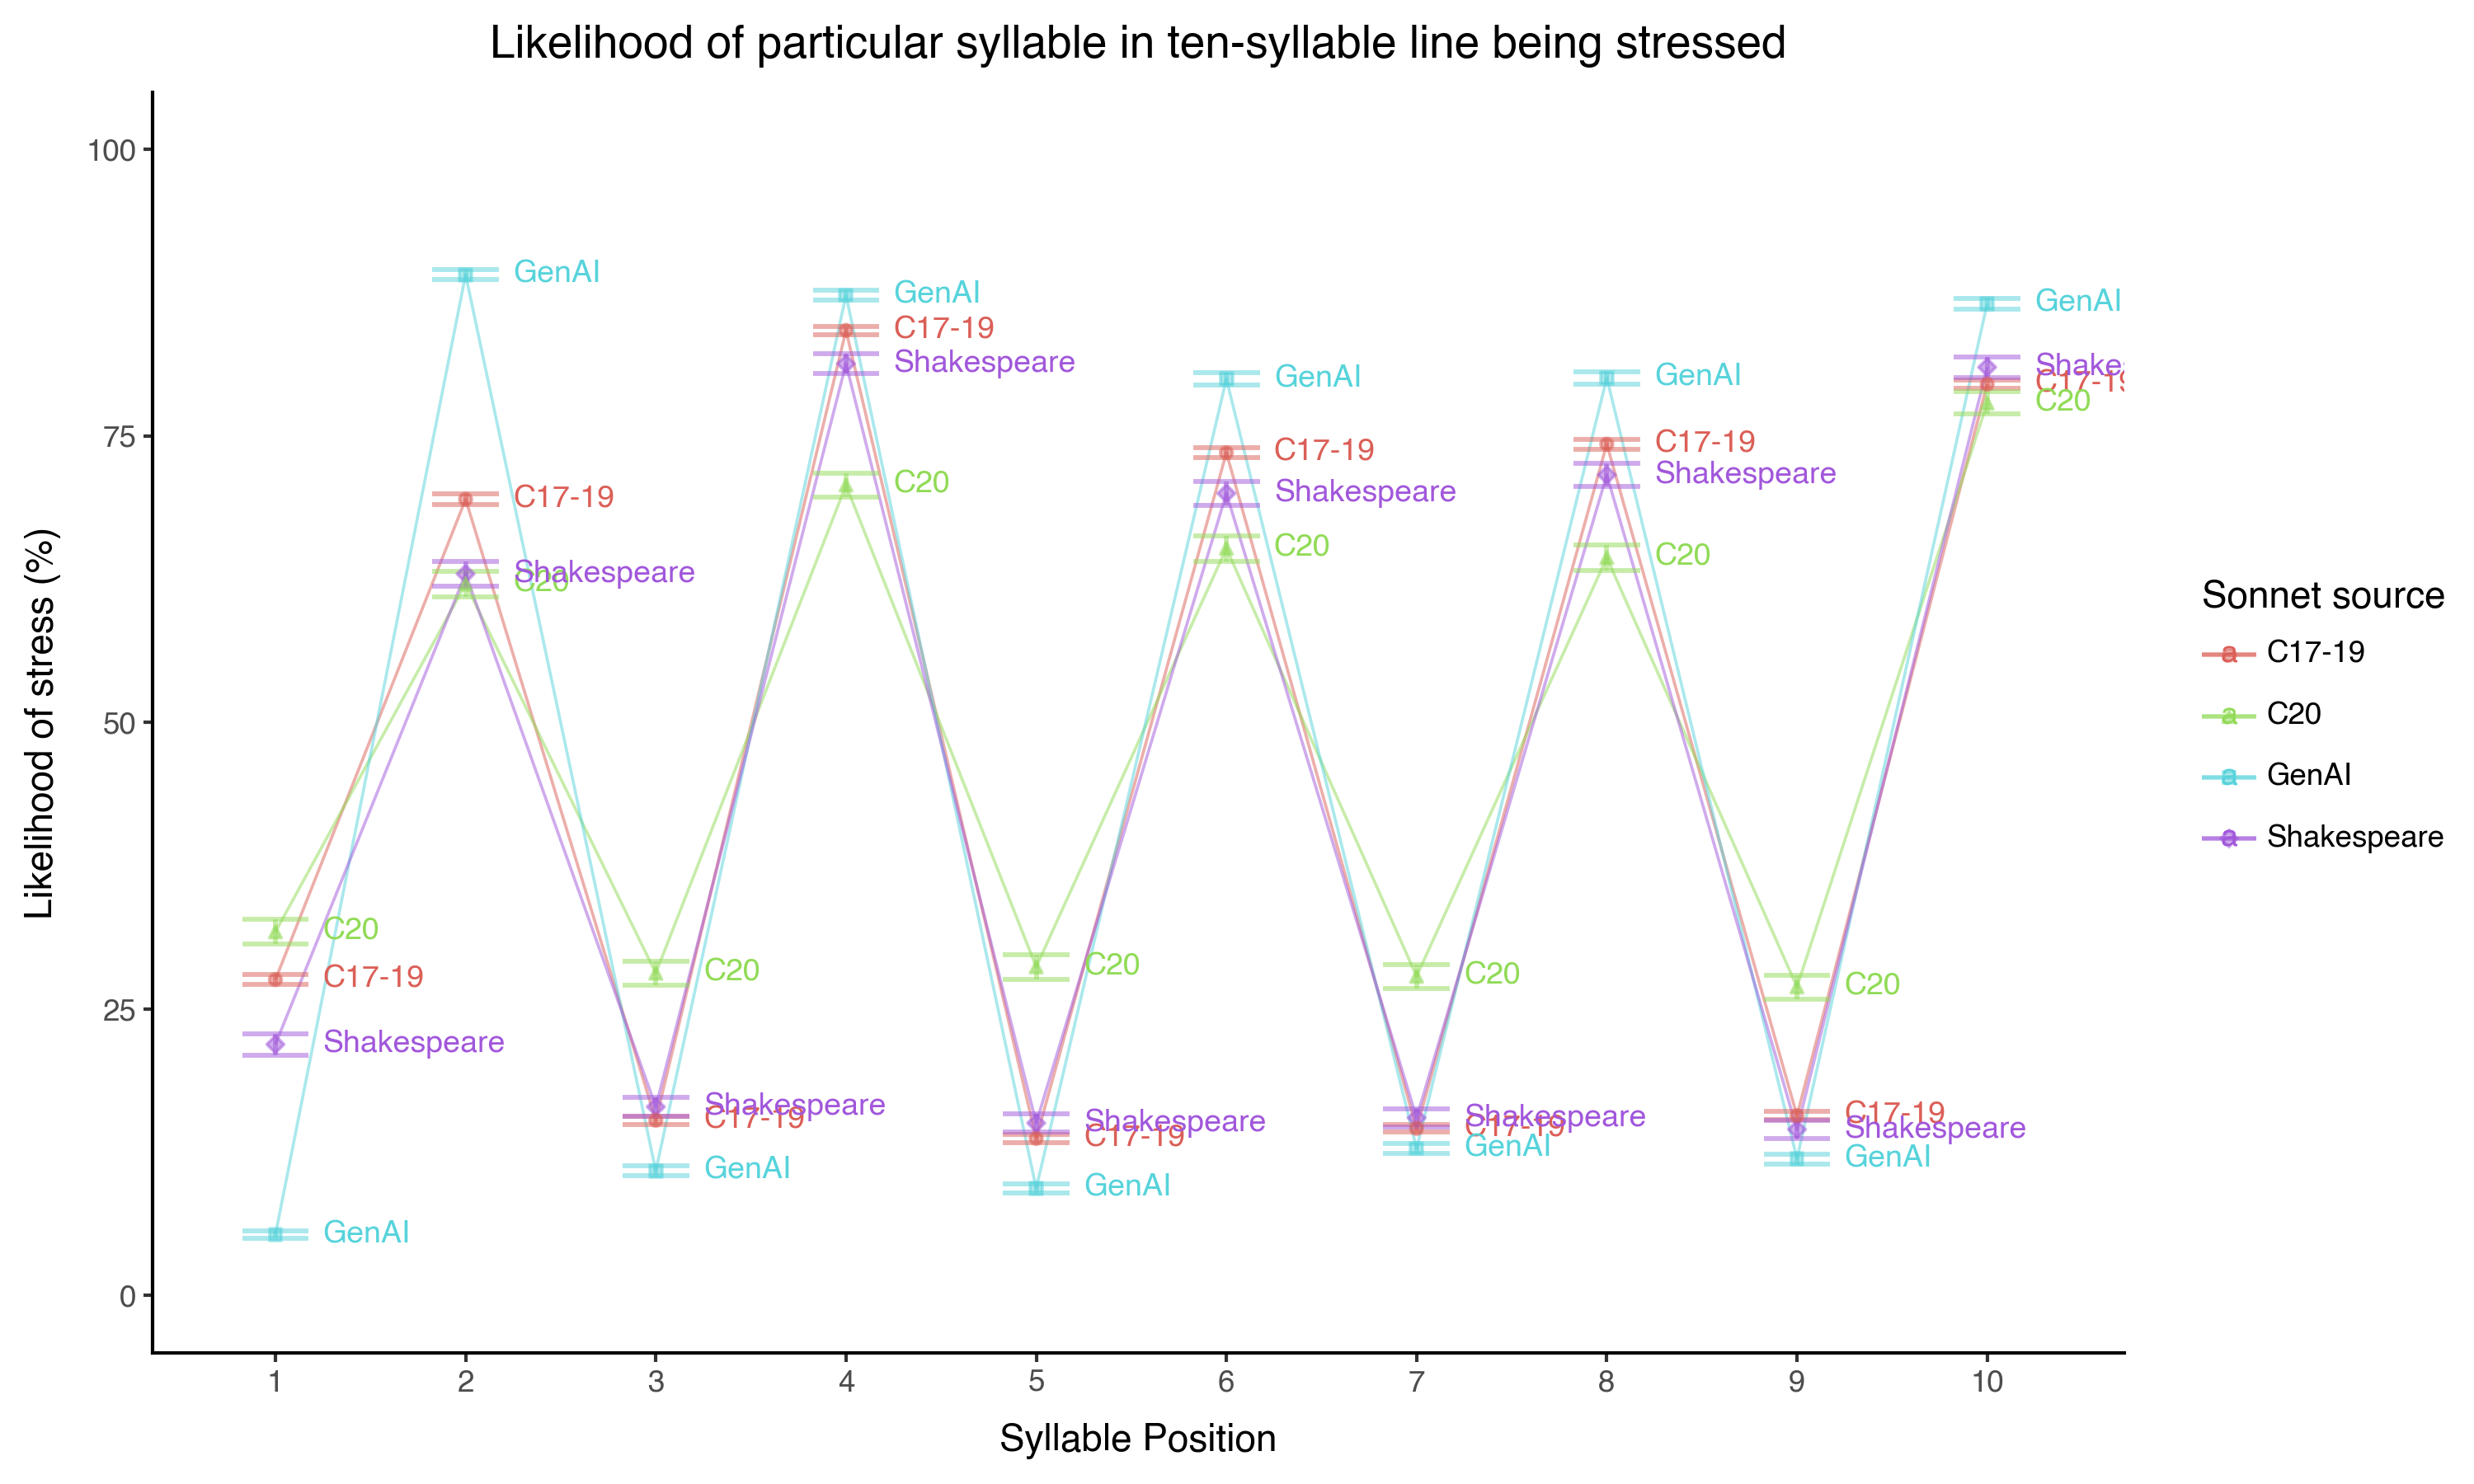

In [ ]:
documentation(plot_stress_by_syll)
plot_stress_by_syll(df_rhythm)

In [10]:
df_rhythm_syll = get_rhythm_data_by_syll(df_rhythm)
df_stats = compute_all_stat_signif(
    df_rhythm_syll,
    'syll_num',
    'group',
    'stress'
)
df_stats

##### `compute_all_stat_signif`

```md

    Compute statistical significance tests for all subgroups within a DataFrame.

    Groups the DataFrame by the specified grouping variable, then runs pairwise statistical
    comparisons within each subgroup using compute_stat_signif. Useful for analyzing
    differences across different categories (e.g., periods, sources).

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the data to analyze
    groupby : str, default='period'
        Column name to group by before running statistical comparisons
    groupby_stat : str or list of str, default='model'
        Column name(s) to use for within-group statistical comparisons
    valname : str, default='rhyme_pred_perc'
        Column name containing the values to compare between groups
    verbose : bool, default=DEFAULT_VERBOSE
        Whether to show progress bar during computation

    Returns
    -------
    pandas.DataFrame
        Concatenated DataFrame with statistical comparison results from all subgroups.
        Each row represents a pairwise comparison within a subgroup, with an additional
        'groupby' column indicating which subgroup the comparison belongs to.

    Calls
    -----
    - compute_stat_signif()
    
```
----


Computing statistical significance tests for syll_num=10: 100%|██████████| 10/10 [00:53<00:00,  5.37s/it]


,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant,group,groupby
4,C20 vs GenAI,1831,5376,0.0000,0.868966,large,31.731294,5.301339,True,GenAI,1
5,Shakespeare vs GenAI,1980,5376,0.0000,0.577581,medium,21.919192,5.301339,True,GenAI,1
2,C17-19 vs GenAI,10763,5376,0.0000,0.575074,medium,27.566664,5.301339,True,GenAI,1
3,C20 vs Shakespeare,1831,1980,0.0000,0.223292,small,31.731294,21.919192,True,Shakespeare,1
1,C17-19 vs Shakespeare,10763,1980,0.0000,0.127801,,27.566664,21.919192,True,Shakespeare,1
...,...,...,...,...,...,...,...,...,...,...,...
2,C17-19 vs GenAI,10763,5376,0.0000,0.183378,,79.531729,86.569940,True,GenAI,10
5,Shakespeare vs GenAI,1980,5376,0.0000,0.156375,,81.010101,86.569940,True,GenAI,10
3,C20 vs Shakespeare,1831,1980,0.0205,0.077559,,77.880939,81.010101,True,Shakespeare,10
0,C17-19 vs C20,10763,1831,0.1089,0.040740,,79.531729,77.880939,False,C20,10


In [12]:
df_stats.query('comparison=="Shakespeare vs GenAI"')

,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant,group,groupby
5,Shakespeare vs GenAI,1980,5376,0.0000,0.577581,medium,21.919192,5.301339,True,GenAI,1
5,Shakespeare vs GenAI,1980,5376,0.0000,0.713355,medium,62.979798,89.081101,True,GenAI,2
5,Shakespeare vs GenAI,1980,5376,0.0000,0.169944,,16.464646,10.881696,True,GenAI,3
5,Shakespeare vs GenAI,1980,5376,0.0000,0.171281,,81.313131,87.295387,True,GenAI,4
5,Shakespeare vs GenAI,1980,5376,0.0000,0.183374,,15.050505,9.356399,True,GenAI,5
5,Shakespeare vs GenAI,1980,5376,0.0000,0.239671,small,70.000000,79.985119,True,GenAI,6
5,Shakespeare vs GenAI,1980,5376,0.0034,0.078046,,15.505051,12.834821,True,GenAI,7
5,Shakespeare vs GenAI,1980,5376,0.0000,0.204422,small,71.616162,80.078125,True,GenAI,8
5,Shakespeare vs GenAI,1980,5376,0.0044,0.077487,,14.494949,11.923363,True,GenAI,9
5,Shakespeare vs GenAI,1980,5376,0.0000,0.156375,,81.010101,86.569940,True,GenAI,10
